In [1]:
# 1. crop_recommendation.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBClassifier
import pickle

In [4]:
# 2. Load or create dataset

df = pd.read_csv("Crop_recommendation.csv")

print(df.head())
print(df.describe())
print(df.info())
print(df.isnull( ).sum())
df['label'] = df['label'].str.capitalize()
print(df.head())
print(df['label'].unique())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.

In [5]:
# Define a dictionary for replacements
replacement = {'Pigeonpeas': 'Arhar/Tur'}

# Apply the replacements
df['label'] = df['label'].replace(replacement)

print(df.head())
print("Dataset shape:", df.shape)
print(df['label'].unique())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  Rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  Rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  Rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  Rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  Rice
Dataset shape: (2200, 8)
['Rice' 'Maize' 'Chickpea' 'Kidneybeans' 'Arhar/Tur' 'Mothbeans'
 'Mungbean' 'Blackgram' 'Lentil' 'Pomegranate' 'Banana' 'Mango' 'Grapes'
 'Watermelon' 'Muskmelon' 'Apple' 'Orange' 'Papaya' 'Coconut' 'Cotton'
 'Jute' 'Coffee']


In [6]:
# 3. Prepare data
# --------------------------
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 4. Build model
# --------------------------
model = RandomForestClassifier(n_estimators=101, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=101, random_state=42)

In [8]:
# 5. Evaluate
# --------------------------
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9931818181818182

Classification Report:
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        23
   Arhar/Tur       1.00      1.00      1.00        23
      Banana       1.00      1.00      1.00        21
   Blackgram       1.00      1.00      1.00        20
    Chickpea       1.00      1.00      1.00        26
     Coconut       1.00      1.00      1.00        27
      Coffee       1.00      1.00      1.00        17
      Cotton       1.00      1.00      1.00        17
      Grapes       1.00      1.00      1.00        14
        Jute       0.92      1.00      0.96        23
 Kidneybeans       1.00      1.00      1.00        20
      Lentil       0.92      1.00      0.96        11
       Maize       1.00      1.00      1.00        21
       Mango       1.00      1.00      1.00        19
   Mothbeans       1.00      0.96      0.98        24
    Mungbean       1.00      1.00      1.00        19
   Muskmelon       1.00    

In [9]:
# 6. Example prediction
# --------------------------
sample_input = np.array([[90, 40, 40, 38.0, 80.0, 6.5, 200.0]])  # Example values
predicted_crop = model.predict(sample_input)[0]
print(f"Recommended crop for given conditions: {predicted_crop}")

Recommended crop for given conditions: Jute


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [10]:
# 7. Save model
# --------------------------
pickle.dump(model, open("crop_recommendation_model.pkl", "wb"))
print("✅ Model saved as crop_recommendation_model.pkl")

✅ Model saved as crop_recommendation_model.pkl


In [2]:
######################################### Crop Yield Prediction ##########################################

In [11]:
# 8. Load Dataset
# =============================
df1 = pd.read_csv("crop_yield.csv")

print("Dataset shape:", df1.shape)
print(df1.head())
print(df1.describe())
print(df1.info())
print(df1.isnull( ).sum())
df1['Crop'] = df1['Crop'].str.capitalize()
print(df1.head())
print(df1['Crop'].unique())

Dataset shape: (19689, 10)
           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  
          Crop_Year          Area    Production  Annual_Rainfall  \
count  19689.000000  1.968900e+04  1.968900e+04     19689.000000   
mean    2009.127584  1.799266e+05  1.643594e+07      1437.755177   


In [12]:
df1 = df1.query('`Crop` != ["Other summer pulses", "Other cereals", "Other oilseeds", "Oilseeds total", "Peas & beans (pulses)", \
                            "Other kharif pulses", "Other  rabi pulses", "Coconut "]')
df1 = df1.query('`Crop_Year` != 2020')
# df1 = df1.query('`Crop_Year` >= 2002')
df1 = df1.query('`Yield` <= 5')

crop_count = df1['Crop'].value_counts()
valid_crop = crop_count[crop_count > 100].index
df1 = df1[df1['Crop'].isin(valid_crop)]

print(df1.head())
print("Dataset shape:", df1.shape)
print(df1['Crop'].unique())

           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   
5  Dry chillies       1997  Whole Year   Assam  13587.0        9073   

   Annual_Rainfall  Fertilizer  Pesticide     Yield  
0           2051.4  7024878.38   22882.34  0.796087  
1           2051.4   631643.29    2057.47  0.710435  
2           2051.4    75755.32     246.76  0.238333  
4           2051.4   165500.63     539.09  0.420909  
5           2051.4  1293074.79    4211.97  0.643636  
Dataset shape: (14640, 10)
['Arecanut' 'Arhar/tur' 'Castor seed' 'Cotton(lint)' 'Dry chillies' 'Gram'
 'Linseed' 'Maize' 'Mesta' 'Niger seed' 'Rapeseed &mustard' 'Rice'
 'Sesamum' 'Small millets' 'Tobacco' 'Turmeric' 'Wheat' 'Bajra'
 'Black pepper' 

In [13]:
# Define a dictionary for replacements
replacements = {'Arecanut': 'Arecanut/Supari', 'Arhar/tur': 'Arhar/Tur', 'Castor seed': 'Castor Seed', 'Cotton(lint)': 'Cotton', 'Moth': 'Mothbeans', \
                'Dry chillies': 'Dry Chillies', 'Niger seed': 'Niger Seed', 'Rapeseed &mustard': 'Rapeseed & Mustard', 'Sesamum': 'Sesamum/Til', \
                'Small millets': 'Small Millets', 'Sweet potato': 'Sweet Potato', 'Black pepper': 'Black Pepper', 'Moong(green gram)': 'Mungbean',\
                'Cowpea(lobia)': 'Cowpea/Lobia', 'Guar seed': 'Guar Seed'}

# Apply the replacements
df1['Crop'] = df1['Crop'].replace(replacements)

print(df1.head())
print(df1['Crop'].unique())
print(df1.describe())
print(df1['Crop'].value_counts())
print(df1['State'].value_counts())

              Crop  Crop_Year       Season  State     Area  Production  \
0  Arecanut/Supari       1997  Whole Year   Assam  73814.0       56708   
1        Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2      Castor Seed       1997  Kharif       Assam    796.0          22   
4           Cotton       1997  Kharif       Assam   1739.0         794   
5     Dry Chillies       1997  Whole Year   Assam  13587.0        9073   

   Annual_Rainfall  Fertilizer  Pesticide     Yield  
0           2051.4  7024878.38   22882.34  0.796087  
1           2051.4   631643.29    2057.47  0.710435  
2           2051.4    75755.32     246.76  0.238333  
4           2051.4   165500.63     539.09  0.420909  
5           2051.4  1293074.79    4211.97  0.643636  
['Arecanut/Supari' 'Arhar/Tur' 'Castor Seed' 'Cotton' 'Dry Chillies'
 'Gram' 'Linseed' 'Maize' 'Mesta' 'Niger Seed' 'Rapeseed & Mustard' 'Rice'
 'Sesamum/Til' 'Small Millets' 'Tobacco' 'Turmeric' 'Wheat' 'Bajra'
 'Black Pepper' 'Co

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


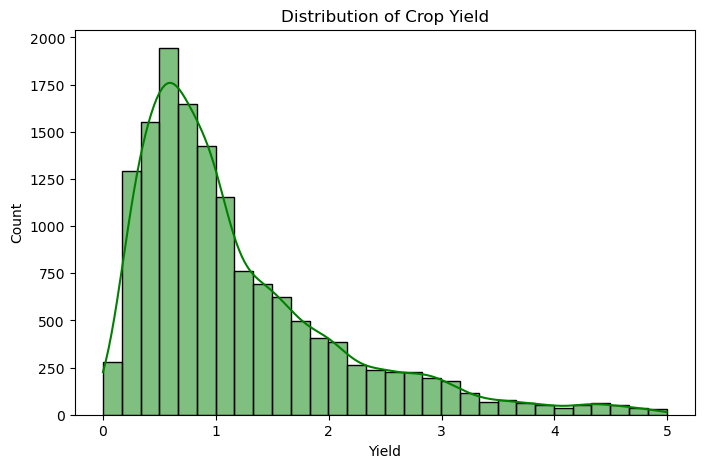

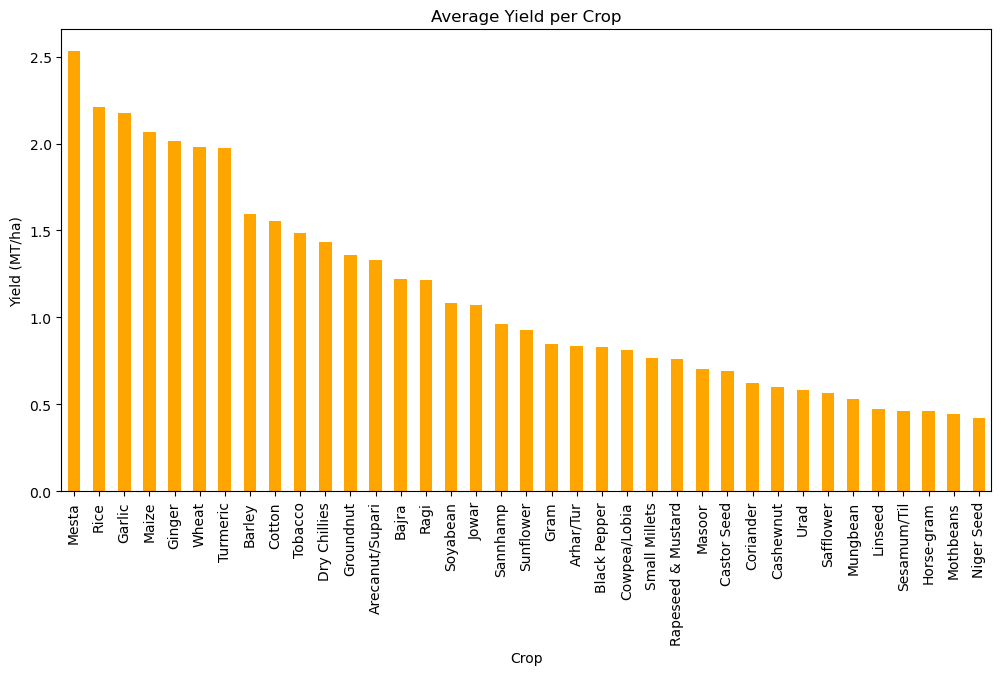

C:\Users\HP\AppData\Local\Temp\ipykernel_1200\3873248577.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Crop_Year', y='Yield', data=df1, ci=None)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


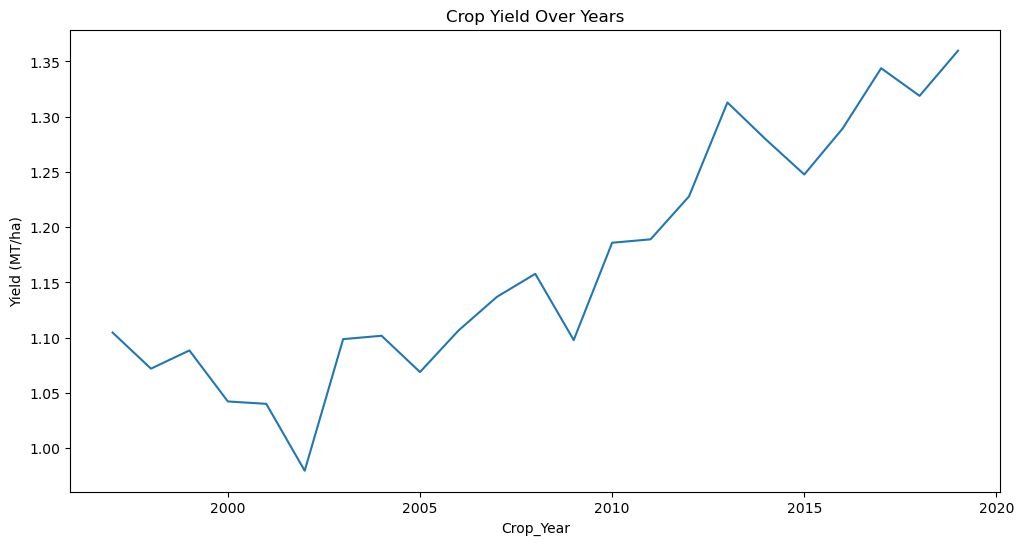

In [14]:
# 9. Data Visualization
# =============================

# Yield distribution
plt.figure(figsize=(8, 5))
sns.histplot(df1['Yield'], kde=True, bins=30, color='green')
plt.title("Distribution of Crop Yield")
plt.show()

# Average yield by crop
plt.figure(figsize=(12, 6))
avg_yield_crop = df1.groupby('Crop')['Yield'].mean().sort_values(ascending=False)
avg_yield_crop.plot(kind='bar', color='orange')
plt.title("Average Yield per Crop")
plt.ylabel("Yield (MT/ha)")
plt.xticks(rotation=90)
plt.show()

# Yield over years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Crop_Year', y='Yield', data=df1, ci=None)
plt.title("Crop Yield Over Years")
plt.ylabel("Yield (MT/ha)")
plt.show()


In [15]:
# 10. Encode Categorical Variables
# =============================
label_encoders = {}
for col in ['Crop', 'Season', 'State']:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    label_encoders[col] = le


['label_encoders.pkl']

In [16]:
print(df1.head(10))
print(df1['Crop'].unique())
print(df1['Season'].unique())
print(df1['State'].unique())

    Crop  Crop_Year  Season  State     Area  Production  Annual_Rainfall  \
0      0       1997       4      2  73814.0       56708           2051.4   
1      1       1997       1      2   6637.0        4685           2051.4   
2      6       1997       1      2    796.0          22           2051.4   
4      8       1997       1      2   1739.0         794           2051.4   
5     10       1997       4      2  13587.0        9073           2051.4   
6     13       1997       2      2   2979.0        1507           2051.4   
8     17       1997       2      2  10098.0        5158           2051.4   
9     18       1997       1      2  19216.0       14721           2051.4   
10    20       1997       1      2   5915.0       29003           2051.4   
11    23       1997       4      2   9914.0        5076           2051.4   

    Fertilizer  Pesticide     Yield  
0   7024878.38   22882.34  0.796087  
1    631643.29    2057.47  0.710435  
2     75755.32     246.76  0.238333  
4    165500

In [17]:
# 11. Train-Test Split
# =============================
X1 = df1[['Crop', 'Crop_Year', 'State', 'Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']] #'Season', 
y1 = df1['Yield']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify = df1['Crop'])

# =============================
# 12. Model Training
# =============================
model_1 = RandomForestRegressor(n_estimators=101, random_state=42)
model_1.fit(X_train_1, y_train_1)

RandomForestRegressor(n_estimators=101, random_state=42)

In [19]:
# =============================
# 13. Evaluation
# =============================
y_pred_1 = model_1.predict(X_test_1)
n = len(y_test_1)   # number of observations
p = X_test_1.shape[1]  # number of predictors

# R²
r2 = r2_score(y_test_1, y_pred_1)

# Adjusted R²
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# MAE, MSE, RMSE
mae = mean_absolute_error(y_test_1, y_pred_1)
mse = mean_squared_error(y_test_1, y_pred_1)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adj_r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


R² Score: 0.8169
Adjusted R² Score: 0.8165
MAE: 0.2186
MSE: 0.1473
RMSE: 0.3838


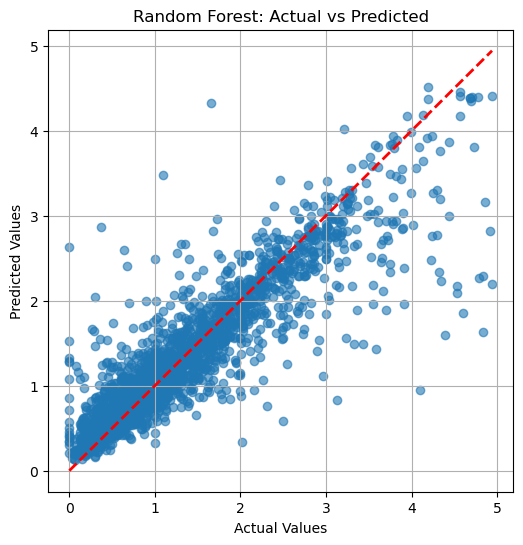

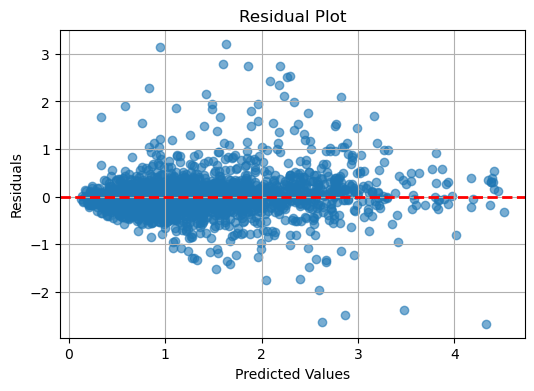

In [20]:
# ----- Plot 1: Predicted vs Actual -----
plt.figure(figsize=(6, 6))
plt.scatter(y_test_1, y_pred_1, alpha=0.6)
plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')
plt.grid(True)
plt.show()

# ----- Plot 2: Residual Plot -----
residuals_1 = y_test_1 - y_pred_1
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_1, residuals_1, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

In [21]:
# 14. Save Model
# =============================
pickle.dump(model_1, open("crop_yield_prediction_model.pkl", "wb"))
pickle.dump(label_encoders, open("label_encoders.pkl", "wb"))

print("✅ Model saved as crop_yield_prediction_model.pkl")

✅ Model saved as crop_yield_prediction_model.pkl


In [24]:
# 15. Example Prediction
# =============================
# Example input: Rice in 2025, Kharif, Punjab, area=1500 ha, rainfall=900 mm, fertilizer=2000 kg, pesticide=300 kg
input_data1 = {
    'Crop': label_encoders['Crop'].transform(['Rice'])[0],
    'Crop_Year': 2024,
    # 'Season': label_encoders['Season'].transform(['Kharif'])[0],
    'State': label_encoders['State'].transform(['Punjab'])[0],
    'Area': 1500,
    'Annual_Rainfall': 900,
    'Fertilizer': 2000,
    'Pesticide': 300
}

input_df1 = pd.DataFrame([input_data1])
predicted_yield_1 = model_1.predict(input_df1)[0]
print(f"🌾 Predicted Crop Yield: {predicted_yield_1:.2f} MT/ha")

🌾 Predicted Crop Yield: 1.77 MT/ha


In [ ]:
# K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model_1, X1, y1, scoring='r2', cv=kf)

print("R² scores for each fold:", scores)
print("Mean R² score:", np.mean(scores))
print("Standard deviation of R²:", np.std(scores))

In [235]:
# this code was used to extract data from different sheets into a single one.
"""
# Load the new Excel file
file_path = '2018-19.xlsx'

# Read all sheets into dictionary
all_sheets = pd.read_excel(file_path, sheet_name=None, header=None)

combined_data = []

for sheet_name, df in all_sheets.items():
    try:
        # Extract Year and Crop
        year = df.iloc[2, 2]   # C3
        crop = df.iloc[2, 0]   # A3
        
        # Extract States from row 4 (index 3) starting col D (index 3) excluding NaN
        states = df.iloc[3, 3:].dropna().tolist()
        
        # Extract Cost of Cultivation from row 6 (index 5), same columns
        cost_values = df.iloc[5, 3:3+len(states)].tolist()
        
        # Extract Implicit Rate from row 36 (index 35), same columns
        implicit_values = df.iloc[33, 3:3+len(states)].tolist()
        
        # Build DataFrame for this sheet
        sheet_df = pd.DataFrame({
            'Year': [year] * len(states),
            'Crop': [crop] * len(states),
            'States': states,
            'Cost of Cultivation (A2)': cost_values,
            'Implicit Rate': implicit_values
        })
        
        combined_data.append(sheet_df)
    except Exception as e:
        print(f"Error processing sheet {sheet_name}: {e}")

# Combine all data
final_df = pd.concat(combined_data, ignore_index=True)

# Save output
output_path = 'combined_crops_data_2018-19.xlsx'
final_df.to_excel(output_path, index=False)

output_path
"""

'combined_crops_data_2018-19.xlsx'

In [ ]:
#this code was used to combine yearly data for profitability model
"""
import glob
import os

# Path to your Excel files (adjust the folder path & extension)
folder_path = "combined_crop_data"
excel_files = glob.glob(os.path.join(folder_path, "*.xlsx"))

# List to store DataFrames
all_data = []

for file in excel_files:
    df = pd.read_excel(file)  # Reads the single sheet
    all_data.append(df)

# Combine all into one DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Save to a single Excel file
output_path = os.path.join(folder_path, "crop_value_cost_data.xlsx")
combined_df.to_excel(output_path, index=False)

print(f"Combined file saved at: {output_path}")
"""

In [41]:
# Predict Cost of Cultivation & Implicit Rate
# -----------------------------
# 1. Load Dataset
# -----------------------------
# Example: Replace with your dataset path
df2 = pd.read_excel("crop_value_cost_data.xlsx")

# 2. Ensure correct data types
# -----------------------------
df2['Year'] = df2['Year'].astype(int)  # Ensure year is integer

In [42]:
df2['Crop'] = df2['Crop'].str.capitalize()
df2.rename(columns={'States':'State'}, inplace = True)
replacements = {'Arhar': 'Arhar/Tur', 'Nigerseed': 'Niger Seed', 'Rapeseed & mustard': 'Rapeseed & Mustard', 'Sesamum': 'Sesamum/Til', \
                'Paddy': 'Rice', 'Moong': 'Mungbean'}

# Apply the replacements
df2['Crop'] = df2['Crop'].replace(replacements)

print(df2['Crop'].unique())
print(df2.head())

['Arhar/Tur' 'Bajra' 'Cotton' 'Groundnut' 'Jowar' 'Maize' 'Mungbean'
 'Niger Seed' 'Rice' 'Ragi' 'Sesamum/Til' 'Soyabean' 'Sunflower' 'Urad'
 'Barley' 'Gram' 'Lentil' 'Rapeseed & Mustard' 'Safflower' 'Wheat' 'Jute'
 'Onion' 'Potato' 'Sugarcane']
   Year       Crop           State  Cost of Cultivation  Implicit Rate
0  2014  Arhar/Tur  Andhra Pradesh             20678.18        5281.83
1  2014  Arhar/Tur         Gujarat             24084.83        5284.50
2  2014  Arhar/Tur  Madhya Pradesh             12901.43        4626.26
3  2014  Arhar/Tur       Karnataka             18964.72        5353.05
4  2014  Arhar/Tur     Maharashtra             33341.07        5289.46


In [43]:
# 3. Encode categorical variables
# -----------------------------
label_encoders_1 = {}
label_encoders_1['Crop'] = LabelEncoder()
df2['Crop'] = label_encoders_1['Crop'].fit_transform(df2['Crop'])

# Encode States
label_encoders_1['State'] = LabelEncoder()
df2['State'] = label_encoders_1['State'].fit_transform(df2['State'])

df2.head()

,Year,Crop,State,Cost of Cultivation,Implicit Rate
0,2014,0,0,20678.18,5281.83
1,2014,0,5,24084.83,5284.50
2,2014,0,13,12901.43,4626.26
3,2014,0,10,18964.72,5353.05
4,2014,0,14,33341.07,5289.46


In [44]:
# 4. Features (X) & Targets (y)
# -----------------------------
X_2 = df2[['Year', 'Crop', 'State']]
y_2 = df2[['Cost of Cultivation', 'Implicit Rate']]

# Convert Implicit Rate from per quintal to per metric ton (1 metric ton = 10 quintals)
y_2['Implicit_Rate_per_MT'] = y_2['Implicit Rate'] * 10

# Drop old quintal column if not needed
y_2 = y_2[['Cost of Cultivation', 'Implicit_Rate_per_MT']]

C:\Users\HP\AppData\Local\Temp\ipykernel_1200\1801960107.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_2['Implicit_Rate_per_MT'] = y_2['Implicit Rate'] * 10


In [45]:
# 5. Train-Test Split
# -----------------------------
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2, y_2, test_size=0.2, random_state=42, stratify = df2['Crop']
)

# -----------------------------
# 6. Build Model
# -----------------------------
model_2 = MultiOutputRegressor(RandomForestRegressor(
    n_estimators=101, random_state=42
))
model_2.fit(X_train_2, y_train_2)

MultiOutputRegressor(estimator=RandomForestRegressor(n_estimators=101,
                                                     random_state=42))

In [46]:
# 7. Predictions
# -----------------------------
y_pred_2 = model_2.predict(X_test_2)

# -----------------------------
# 8. Evaluation
# -----------------------------

mse = mean_squared_error(y_test_2, y_pred_2, multioutput='raw_values')
r2 = r2_score(y_test_2, y_pred_2, multioutput='raw_values')

print("Mean Squared Error (Cost of Cultivation, Implicit Rate per MT):", mse)
print("R² Score (Cost of Cultivation, Implicit Rate per MT):", r2)

Mean Squared Error (Cost of Cultivation, Implicit Rate per MT): [60994379.21322727 36354577.44014703]
R² Score (Cost of Cultivation, Implicit Rate per MT): [0.87666884 0.91678674]


In [47]:
# Save model
pickle.dump(model_2, open("crop_profitability_model.pkl", "wb"))
pickle.dump(label_encoders_1, open("label_encoders_1.pkl", "wb"))

['label_encoders_1.pkl']

In [48]:
# 9. Example Prediction
# -----------------------------
# Example: Predict for Year=2022, Crop='Rice', State='Punjab'
example = pd.DataFrame({
    'Year': [2022],
    'Crop': [label_encoders_1['Crop'].transform(['Rice'])[0]],
    'State': [label_encoders_1['State'].transform(['Gujarat'])[0]]
})

example_pred = model_2.predict(example)
print(f"Predicted Cost of Cultivation (A2): ₹{example_pred[0][0]:,.2f}")
print(f"Predicted Implicit Rate (per MT): ₹{example_pred[0][1]:,.2f}")

Predicted Cost of Cultivation (A2): ₹47,103.37
Predicted Implicit Rate (per MT): ₹16,735.47


In [49]:
def calculate_profitability(year, crop_name, state_name, area_hectares):
    # Step 1: Encode inputs
    crop_encoded = label_encoders_1['Crop'].transform([crop_name])[0]
    state_encoded = label_encoders_1['State'].transform([state_name])[0]

    example = pd.DataFrame({
        'Year': [year],
        'Crop': [crop_encoded],
        'State': [state_encoded]
    })

    # Step 2: Predict cost of cultivation per hectare
    predicted_cost_per_ha = model_2.predict(example)[0][0]

    # Step 3: Predict implicit rate per metric ton
    predicted_rate_per_mt = model_2.predict(example)[0][1]

    # Step 4: Predicted yield per hectare
    yield_per_ha = predicted_yield_1

    # Step 5: Calculate totals
    total_yield_mt = yield_per_ha * area_hectares
    total_revenue = total_yield_mt * predicted_rate_per_mt
    total_cost = predicted_cost_per_ha * area_hectares
    profit = total_revenue - total_cost

    # Step 6: Profitability status & percentage
    profit_margin_pct = (profit / total_cost) * 100 if total_cost != 0 else 0
    profitable_status = "Profitable ✅" if profit > 0 else "Not Profitable ❌"

    return {
        'Predicted Cost per ha': predicted_cost_per_ha,
        'Predicted Rate per MT': predicted_rate_per_mt,
        'Predicted Yield per ha': yield_per_ha,
        'Total Revenue': total_revenue,
        'Total Cost': total_cost,
        'Profit': profit,
        'Profit Margin %': profit_margin_pct,
        'Status': profitable_status
    }

In [50]:
# Example usage
result = calculate_profitability(
    year=2022,
    crop_name='Rice',
    state_name='Punjab',
    area_hectares=10
    # predicted_yield_per_hectare=4.5  # from yield prediction model
)

print("\n--- Profitability Prediction ---")
for k, v in result.items():
    if isinstance(v, float):
        print(f"{k}: {v:,.2f}")
    else:
        print(f"{k}: {v}")


--- Profitability Prediction ---
Predicted Cost per ha: 52,643.73
Predicted Rate per MT: 19,789.40
Predicted Yield per ha: 1.77
Total Revenue: 349,323.13
Total Cost: 526,437.32
Profit: -177,114.18
Profit Margin %: -33.64
Status: Not Profitable ❌
